In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
def k_means_clustering(data, k, max_iterations=100):
    # Randomly initialize the cluster centers
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for i in range(max_iterations):
        # Assign each data point to the nearest centroid
        distances = np.sqrt(((data - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        closest_cluster = np.argmin(distances, axis=0)
        
        # Update the centroids
        new_centroids = np.array([data[closest_cluster == j].mean(axis=0) for j in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return closest_cluster, centroids, distances

In [3]:
def calculate_average_sum_of_squares(data, clusters, centroids):
    k = centroids.shape[0] # Number of clusters
    sum_of_squares = np.zeros(k) # Sum of squares for each cluster
    counts = np.zeros(k) # Number of data points assigned to each cluster

    # Calculate the sum of squares for each cluster
    for i in range(data.shape[0]):

        cluster_idk = clusters[i] # Holds the index of the cluster to which the data point belongs
        distance = np.sum((data[i] - centroids[cluster_idk]) ** 2) # Euclidean distance between the data point and its centroid
        sum_of_squares[cluster_idk] += distance # Add the distance to the sum of squares
        counts[cluster_idk] += 1

    # Avoid division by zero for empty clusters
    counts[counts == 0] = 1

    # Calculate the average sum of squares
    avg_sum_of_squares = sum_of_squares / counts # Average sum of squares for each cluster
    return avg_sum_of_squares

In [4]:
def print_average_sum_of_squares(data, clusters, centroids):
    avg_sum_of_squares = calculate_average_sum_of_squares(data, clusters, centroids) # Calculate the average sum of squares for each centroid
    for j, avg in enumerate(avg_sum_of_squares): # Loop through each cluster
        print(f"Centroid {j}: Average Sum of Squares = {avg:.4f}")

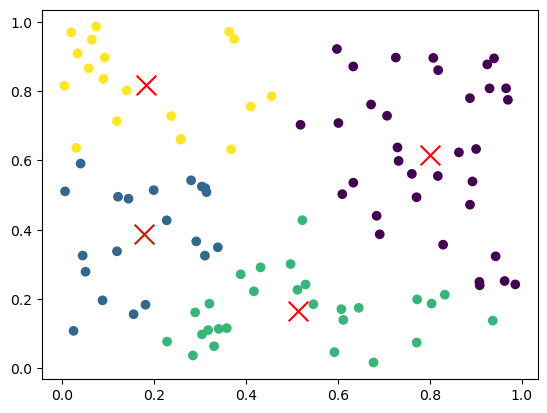

In [5]:
# Example usage
if __name__ == "__main__":
    # Generate some random data
    np.random.seed(42)
    data = np.random.rand(100, 2)  # 100 points in 2D space

    # Number of clusters
    k = 4

    # Perform K-Means clustering
    clusters, centroids, distance = k_means_clustering(data, k)
    arr = np.array(distance, dtype = np.float64)
    
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
    plt.show()

In [6]:
calculate_average_sum_of_squares (data, clusters, centroids)

array([0.06243849, 0.03245881, 0.04501267, 0.03572755])

In [7]:
print_average_sum_of_squares(data, clusters, centroids)

Centroid 0: Average Sum of Squares = 0.0624
Centroid 1: Average Sum of Squares = 0.0325
Centroid 2: Average Sum of Squares = 0.0450
Centroid 3: Average Sum of Squares = 0.0357


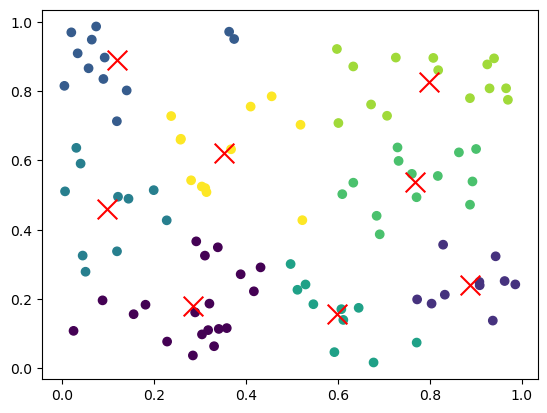

Centroid 0: Average Sum of Squares = 0.0201
Centroid 1: Average Sum of Squares = 0.0085
Centroid 2: Average Sum of Squares = 0.0203
Centroid 3: Average Sum of Squares = 0.0174
Centroid 4: Average Sum of Squares = 0.0137
Centroid 5: Average Sum of Squares = 0.0145
Centroid 6: Average Sum of Squares = 0.0227
Centroid 7: Average Sum of Squares = 0.0212


In [8]:
k = 8
clusters, centroids, distance = k_means_clustering(data, k)
clusters, centroids, distance = k_means_clustering(data, k)
arr = np.array(distance, dtype = np.float64)
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.show()
calculate_average_sum_of_squares (data, clusters, centroids)
print_average_sum_of_squares(data, clusters, centroids)